In [79]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
path = 'spotify_million_playlist_dataset/data_csv_extra/'

In [3]:
!ls spotify_million_playlist_dataset/data_csv_extra/

slice_15_tracks.csv  slice_38_tracks.csv  slice_49_tracks.csv
slice_1_tracks.csv   slice_3_tracks.csv   slice_70_tracks.csv
slice_2_tracks.csv   slice_43_tracks.csv
slice_36_tracks.csv  slice_48_tracks.csv


In [4]:
df = pd.read_csv(path+'slice_1_tracks.csv', header= None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10000,Magic,spotify:track:23khhseCLQqVMCIT1WMAns,Ghost Stories,spotify:album:2G4AUqfwxcV1UdQjm2ouYr,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,285014,0,0.738,0.482,6,-8.917,0,0.0402,0.02660,0.621000,0.1060,0.352,93.457
1,10000,A Sky Full of Stars,spotify:track:0FDzzruyVECATHXKHFs9eJ,Ghost Stories,spotify:album:2G4AUqfwxcV1UdQjm2ouYr,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,268466,1,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970
2,10000,Every Little Thing She Does Is Magic,spotify:track:5DnUFzGSrLiiAJRxKoiwFv,Symphonicities,spotify:album:1dpyonY9ev2z5a7rwfERZh,Sting,spotify:artist:0Ty63ceoRnnJKVEYP0VQpk,296826,2,0.432,0.358,2,-9.970,1,0.0309,0.81500,0.010300,0.1920,0.166,81.119
3,10000,I Wanna Be Your Lover - Single Version,spotify:track:4gi2ioQwGOBXTrXlBR9RfQ,The Hits 2,spotify:album:2E5Jr8tcyqKrGzGPmNA3il,Prince,spotify:artist:5a2EaR3hamoenG9rDuVn8j,180080,3,0.793,0.442,8,-11.293,0,0.0564,0.23600,0.001630,0.0662,0.833,115.995
4,10000,Raspberry Beret,spotify:track:5jSz894ljfWE0IcHBSM39i,Around The World In A Day,spotify:album:5FbrTPPlaNSOsChhKUZxcu,Prince,spotify:artist:5a2EaR3hamoenG9rDuVn8j,215173,4,0.761,0.670,2,-12.759,1,0.0438,0.21000,0.000426,0.0685,0.910,120.752


In [7]:
#clean up the dataset from tracks with problems when retrieving information
def clean_up(df):
    return df.drop(df[df[9]==-999].index)

In [8]:
df = clean_up(df)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10000,Magic,spotify:track:23khhseCLQqVMCIT1WMAns,Ghost Stories,spotify:album:2G4AUqfwxcV1UdQjm2ouYr,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,285014,0,0.738,0.482,6,-8.917,0,0.0402,0.02660,0.621000,0.1060,0.352,93.457
1,10000,A Sky Full of Stars,spotify:track:0FDzzruyVECATHXKHFs9eJ,Ghost Stories,spotify:album:2G4AUqfwxcV1UdQjm2ouYr,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,268466,1,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970
2,10000,Every Little Thing She Does Is Magic,spotify:track:5DnUFzGSrLiiAJRxKoiwFv,Symphonicities,spotify:album:1dpyonY9ev2z5a7rwfERZh,Sting,spotify:artist:0Ty63ceoRnnJKVEYP0VQpk,296826,2,0.432,0.358,2,-9.970,1,0.0309,0.81500,0.010300,0.1920,0.166,81.119
3,10000,I Wanna Be Your Lover - Single Version,spotify:track:4gi2ioQwGOBXTrXlBR9RfQ,The Hits 2,spotify:album:2E5Jr8tcyqKrGzGPmNA3il,Prince,spotify:artist:5a2EaR3hamoenG9rDuVn8j,180080,3,0.793,0.442,8,-11.293,0,0.0564,0.23600,0.001630,0.0662,0.833,115.995
4,10000,Raspberry Beret,spotify:track:5jSz894ljfWE0IcHBSM39i,Around The World In A Day,spotify:album:5FbrTPPlaNSOsChhKUZxcu,Prince,spotify:artist:5a2EaR3hamoenG9rDuVn8j,215173,4,0.761,0.670,2,-12.759,1,0.0438,0.21000,0.000426,0.0685,0.910,120.752


In [12]:
# keep the playlist id, song name, and artist
df = df.drop([3,4,6,7], axis = 1)

In [36]:
df.head()

,0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19
0,10000,Magic,spotify:track:23khhseCLQqVMCIT1WMAns,Coldplay,0,0.738,0.482,6,-8.917,0,0.0402,0.02660,0.621000,0.1060,0.352,93.457
1,10000,A Sky Full of Stars,spotify:track:0FDzzruyVECATHXKHFs9eJ,Coldplay,1,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970
2,10000,Every Little Thing She Does Is Magic,spotify:track:5DnUFzGSrLiiAJRxKoiwFv,Sting,2,0.432,0.358,2,-9.970,1,0.0309,0.81500,0.010300,0.1920,0.166,81.119
3,10000,I Wanna Be Your Lover - Single Version,spotify:track:4gi2ioQwGOBXTrXlBR9RfQ,Prince,3,0.793,0.442,8,-11.293,0,0.0564,0.23600,0.001630,0.0662,0.833,115.995
4,10000,Raspberry Beret,spotify:track:5jSz894ljfWE0IcHBSM39i,Prince,4,0.761,0.670,2,-12.759,1,0.0438,0.21000,0.000426,0.0685,0.910,120.752


In [13]:
# Get Unique sound tracks to compute the similarity measurement
unique_tracks = df.drop_duplicates(2)
unique_tracks.drop(0, axis = 1, inplace = True)
unique_tracks.set_index(2, inplace=True)

/home/mapedrazaj/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
unique_tracks.head()

,1,5,8,9,10,11,12,13,14,15,16,17,18,19
2,,,,,,,,,,,,,,
spotify:track:23khhseCLQqVMCIT1WMAns,Magic,Coldplay,0,0.738,0.482,6,-8.917,0,0.0402,0.02660,0.621000,0.1060,0.352,93.457
spotify:track:0FDzzruyVECATHXKHFs9eJ,A Sky Full of Stars,Coldplay,1,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970
spotify:track:5DnUFzGSrLiiAJRxKoiwFv,Every Little Thing She Does Is Magic,Sting,2,0.432,0.358,2,-9.970,1,0.0309,0.81500,0.010300,0.1920,0.166,81.119
spotify:track:4gi2ioQwGOBXTrXlBR9RfQ,I Wanna Be Your Lover - Single Version,Prince,3,0.793,0.442,8,-11.293,0,0.0564,0.23600,0.001630,0.0662,0.833,115.995
spotify:track:5jSz894ljfWE0IcHBSM39i,Raspberry Beret,Prince,4,0.761,0.670,2,-12.759,1,0.0438,0.21000,0.000426,0.0685,0.910,120.752


In [12]:
#List of playlists in the dataset
playlists = df[0].unique()

<AxesSubplot:>

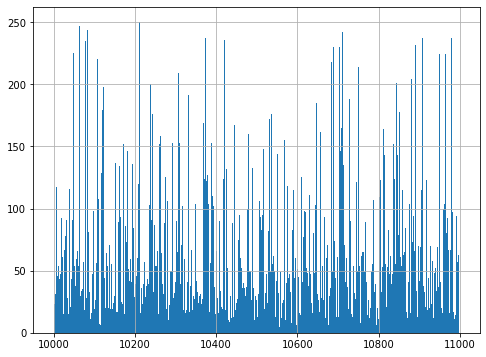

In [13]:
df[0].hist(density = False, bins = 1000, figsize = (8,6))

In [14]:
df[[0,9]].groupby(0).describe()

9                                                            
       count      mean       std    min      25%     50%      75%    max
0                                                                       
10000   16.0  0.635938  0.158328  0.317  0.54425  0.6815  0.75575  0.832
10001   28.0  0.517143  0.137545  0.258  0.44200  0.5020  0.60450  0.797
10002   23.0  0.624609  0.087207  0.466  0.56150  0.6470  0.68200  0.764
10003   14.0  0.652000  0.130528  0.325  0.61175  0.6445  0.73350  0.837
10004   31.0  0.511710  0.101098  0.350  0.44400  0.4940  0.55350  0.860
...      ...       ...       ...    ...      ...     ...      ...    ...
10995   57.0  0.575947  0.120373  0.299  0.50900  0.5810  0.66100  0.814
10996  130.0  0.555569  0.128849  0.229  0.47900  0.5645  0.63500  0.945
10997   63.0  0.559857  0.105810  0.372  0.47850  0.5690  0.61450  0.845
10998   38.0  0.671053  0.104580  0.332  0.60400  0.6740  0.72825  0.886
10999   27.0  0.663370  0.147172  0.364  0.54950  0.7060  0.75700  0.869

[1000 rows x 8 columns]

In [37]:
# define a function that predicts the next tracks for the playlist based on the cosine similarity
# first split the dataset into a 75-25 content

def split_data(df):
    X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)
    return X_train, X_test
    

In [16]:
def get_playlist_vec(df):
    #Column 0 contains the playlist id for that specific track 
    playlist_values = df[[8,9,10,11,12,13,14,15,16,17,18,19]].values
    playlist_vec = playlist_values.mean(axis = 0)
    return playlist_vec

In [46]:
def get_cosine_similarity(tracks_df, playlist_train, n_tracks):
    # The dataframe as input is the training dataframe obtained from the split
    # gets the playlist vector as the average over tracks for the features
    playlist_vec = get_playlist_vec(playlist_train)
    

    tracks= tracks_df.drop(playlist_train[2].values)
#    tracks.reset_index(drop=True, inplace=True)
    tracks_values = tracks[[8,9,10,11,12,13,14,15,16,17,18,19]].values
    rank = cosine_similarity(tracks_values, playlist_vec.reshape(-1, 1).T)
    rank_ids = np.argsort(rank.T)
    
    #get the songs info to be returned
    tracks = tracks.iloc[rank_ids.ravel()[:n_tracks]]
    recommended_tracks = tracks[1] +", "+ tracks[5]
    # Returns the similarity score
    return rank[:n_tracks], recommended_tracks
    
    

In [19]:
test_vec = get_playlist_vec(df[df[0]==10000])
test_matrix = df[df[0]==10000][[8,9,10,11,12,13,14,15,16,17,18,19]].values

In [20]:
test_vec

array([ 7.50000000e+00,  6.35937500e-01,  5.49375000e-01,  5.93750000e+00,
       -9.99412500e+00,  8.12500000e-01,  5.34687500e-02,  2.53785625e-01,
        3.98015225e-02,  2.20843750e-01,  5.54125000e-01,  1.13951625e+02])

In [21]:
t1, t2 = get_cosine_similarity(unique_tracks, df[df[0]==10000], 10)

['You, The 1975' 'Golden Lights, HUDSON'
 'Joy to the World Intro, Jeremy Camp' 'Matthew 1: 23, Jeremy Camp'
 'Victory Theme (FINAL Fantasy Series), Nobuo Uematsu'
 "Michael's Christmas Greeting, Michael Bublé"
 'Thirty Dirty Birds - 2003 Digitally Remastered, Red Hot Chili Peppers'
 'Christmas Greeting, Jeremy Camp'
 "Season's Greetings From Michael Jackson, Michael Jackson"
 'Outro, Rilo Kiley']


In [23]:
t2.index.values

array(['spotify:track:0rJntHXy2EpfYCaIOa30yt',
       'spotify:track:36Opw1tPdxJBKU9vt4Td81',
       'spotify:track:25cclzQ5wXF5Fpt10pum9Q',
       'spotify:track:2kRfSxk35qKp83fvbopI89',
       'spotify:track:6JV4vNn2wjaF7Z0A5fiMcC',
       'spotify:track:3hww6gm2UvMGim9inNmw58',
       'spotify:track:2kWX2aZ7KWBpJqrCFLphOl',
       'spotify:track:7jniAAwYJkLXLlrgFjM15L',
       'spotify:track:4LmoG8VPVL0qGj1dM6qQjf',
       'spotify:track:0YN9E8wdNDYfHpv6UQeLxg'], dtype=object)

In [83]:
t1

array([[0.994906  ],
       [0.99568372],
       [0.99665805],
       [0.99686146],
       [0.99808576],
       [0.99907291],
       [0.99863746],
       [0.99812866],
       [0.99929702],
       [0.99895374]])

In [29]:
np.intersect1d(df[df[0]==10000][2].values,t2.index.values).shape[0]

0

In [76]:
def get_r_score(playlist_id, df):
    # Receive the playlist_id and the dataframe as inputs
    playlist_train, playlist_test = split_data(df[df[0]==playlist_id])
    #Size of the test set
    N = playlist_test.shape[0]
    score, recommended_tracks = get_cosine_similarity(unique_tracks, playlist_train, 100*N)
#    print(recommended_tracks.shape, playlist_test.shape)
    matches = np.intersect1d(recommended_tracks.index.values, playlist_test[2].values)
#    print(matches)
    r_score = matches.shape[0]/playlist_test.shape[0]
    return r_score
        

In [77]:
get_r_score(10000, df)

0.0

In [78]:
scores = []
playlists_df = df[0].unique()
for i in playlists_df:
    scores.append(get_r_score(i,df))

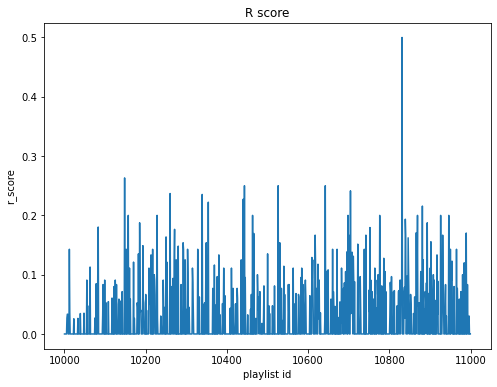

In [87]:
plt.figure(figsize=(8,6))
plt.plot(playlists_df,scores)
plt.xlabel('playlist id');
plt.ylabel('r_score');
plt.title('R score');

In [69]:
test_files = !ls spotify_million_playlist_dataset/data_csv_extra/

In [70]:
test_files

['slice_15_tracks.csv',
 'slice_1_tracks.csv',
 'slice_2_tracks.csv',
 'slice_36_tracks.csv',
 'slice_38_tracks.csv',
 'slice_3_tracks.csv',
 'slice_43_tracks.csv',
 'slice_48_tracks.csv',
 'slice_49_tracks.csv',
 'slice_70_tracks.csv']